In [2]:
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef, confusion_matrix

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

We're able to classify unseen data, but we don't know how to measure if the algorithm is good or not.
There are metrics to evaluate goodness of our classifier.

In [3]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis("off")

## Data loading

First, we split the data into X and y, i.e. into data and labels to predict.

In [5]:
heart = pd.read_csv('data/heart.csv')
labels = heart['output'].values
heart.drop(['output'], axis=1, inplace=True)

In [6]:
heart_ct = ColumnTransformer(
    transformers=[
        ('1', MinMaxScaler(), ['age', 'caa', 'slp', 'thall']),
        ('2', OneHotEncoder(drop='first', categories='auto'), ['cp', 'restecg']), # drop='first' means we remove first column generated by OneHOtEncoding
        ('3', StandardScaler(), ['trtbps', 'oldpeak', 'chol', 'thalachh'])
    ],
    verbose_feature_names_out=False,
    remainder='passthrough'
)

X = heart_ct.fit_transform(heart) # we apply fit_transformer to transform the data
# it's not right to apply it before train_test_split, but it's ok if we want to speed up processing
# BUT THIS IS WRONG!!!

Once a model or a few models have been trained, how can we evaluate their performance?
We introduce a few performance measures, assessing how good is our model in solving the task.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, labels,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=labels) # not necessary to stratify
# we should stratify in the case of unbalanced labels

In [11]:
sum(y_train == 1) / len(y_train), sum(y_test == 1) / len(y_test)

(0.5454545454545454, 0.5409836065573771)

## Performance: Confusion Matrix

The first thing we need to check before using the confusion matrix is the meaning assigned by the tool to the rows and columns.


In [12]:
# build classifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

# make predictions on train and test sets; list of true labels and list of predicted labels
y_train_predicted = knn_clf.predict(X_train)
y_test_predicted = knn_clf.predict(X_test)

/Users/alex_k/Desktop/Machine-Learning-Course/venv/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(


In [14]:
y_test_predicted[:10], y_test[:10]

(array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1]), array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1]))

They are not equal, so obviously accuracy is not 1.

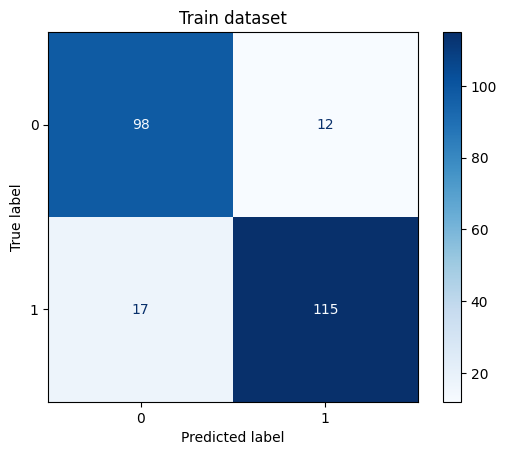

array([[ 98,  12],
       [ 17, 115]])

In [16]:
conf_matrix = confusion_matrix(y_train, y_train_predicted)

# method which allows to visualize the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predicted, cmap=plt.cm.Blues)
plt.title('Train dataset')
plt.show()

conf_matrix

We should expect the score to be very high.

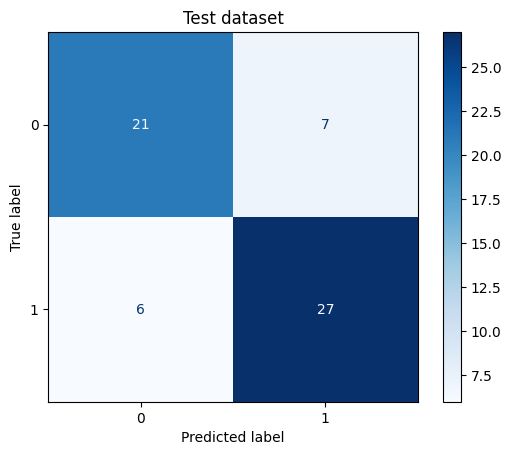

array([[21,  7],
       [ 6, 27]])

In [18]:
conf_matrix = confusion_matrix(y_test, y_test_predicted)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted, cmap=plt.cm.Blues)
plt.title('Test dataset')
plt.show()

conf_matrix

### Accuracy score

In [19]:
accuracy_score(y_train, y_train_predicted), accuracy_score(y_test, y_test_predicted)

(0.8801652892561983, 0.7868852459016393)

Means that algorithm is not as good on test set as on train set.

### Recall score

In [20]:
recall_score(y_train, y_train_predicted), recall_score(y_test, y_test_predicted)

(0.8712121212121212, 0.8181818181818182)

### Precision score

In [21]:
precision_score(y_train, y_train_predicted), precision_score(y_test, y_test_predicted)

(0.905511811023622, 0.7941176470588235)

### F1-score

In [22]:
f1_score(y_train, y_train_predicted), f1_score(y_test, y_test_predicted)

(0.888030888030888, 0.8059701492537314)

In the case of KNN we analyze the impact of the k on the performance of the classifier. Here, we focus on recall as a function of hyperparameter k.

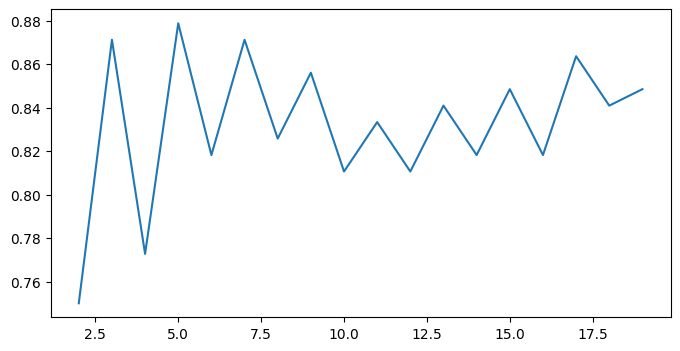

In [25]:
ks = range(2, 20)
recalls = []
for k in ks:
    cls = KNeighborsClassifier(n_neighbors=k)
    cls.fit(X_train, y_train) # fit classifier
    pred = cls.predict(X_train)
    recalls.append(recall_score(y_train, pred)) # compute recall and put it in the array

fig = plt.figure(figsize=(8, 4))
axes = fig.add_subplot()
axes.plot(ks, recalls)

The behaviour is not stable. Classical situation for KNN classifier, because it adapts to the shape of the data by definition.